In [12]:
# Imports

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

#Increases the resolution of the graphs rendered below by changing image format into vector
%config InlineBackend.figure_formats = ['svg']

## Loading and split preprocessed data

In [13]:
# Importing the cleaned dataset
df = pd.read_csv("cleaned_data/data_salaries_cleaned.csv")

# Just double checking that the data has been imported correctly
df.head()

,work_year,salary_cleaned,salary_in_usd_cleaned,company_size_lab,salary_currency_encoded,employee_residence_encoded,company_location_encoded,remote_ratio,job_title_encoded,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,2023.0,80000.0,85847.0,0.0,49064728.0,81406157.0,81406157.0,100.0,2058566.0,0,0,0,1,0,0,1,0
1,2023.0,30000.0,30000.0,2.0,51126126.0,25370322.0,25370322.0,100.0,10028239.0,0,0,1,0,1,0,0,0
2,2023.0,25500.0,25500.0,2.0,51126126.0,25370322.0,25370322.0,100.0,10028239.0,0,0,1,0,1,0,0,0
3,2023.0,175000.0,175000.0,1.0,51126126.0,21365473.0,21365473.0,100.0,72608695.0,0,0,0,1,0,0,1,0
4,2023.0,120000.0,120000.0,1.0,51126126.0,21365473.0,21365473.0,100.0,72608695.0,0,0,0,1,0,0,1,0


The provided dataset encompasses a diverse array of columns, both categorical and numerical. For machine learning applicability, all these variables have been transformed into numerical format. Notably, certain variables in the dataset exhibited a substantial number of unique categories. To address this complexity and facilitate computational efficiency, these were converted using hash mapping techniques. The primary objective of our analysis is to determine the precision with which we can predict an individual's salary in USD, leveraging the information available in the dataset.






In [14]:
# Splitting the data using random state 101 with a 70-30 train-test split

from sklearn.model_selection import train_test_split


# Define the target variable column name
target_column = ["salary_in_usd_cleaned"] # Replace 'target_column' with the name of your target column

# Separate the features (X) and the target variable (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Perform the 70-30 train-test split with a random state of 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


# Create two separate DataFrames for training and testing
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)


# Convert the 'y_test' DataFrame column to a 1D numpy array:
y_test = y_test.values[:, 0]
df_train.head()

,work_year,salary_cleaned,company_size_lab,salary_currency_encoded,employee_residence_encoded,company_location_encoded,remote_ratio,job_title_encoded,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,salary_in_usd_cleaned
342,2023.0,257000.0,1.0,51126126.0,25370322.0,25370322.0,0.0,67921766.0,0,0,0,1,0,0,1,0,257000.0
859,2023.0,172200.0,1.0,51126126.0,25370322.0,25370322.0,0.0,67921766.0,0,0,0,1,0,0,1,0,172200.0
2268,2022.0,135000.0,1.0,51126126.0,25370322.0,25370322.0,0.0,39298127.0,1,0,0,0,0,0,1,0,135000.0
43,2023.0,110680.0,0.0,51126126.0,25370322.0,25370322.0,0.0,94260756.0,1,0,0,0,0,0,1,0,110680.0
1826,2022.0,150000.0,1.0,51126126.0,25370322.0,25370322.0,0.0,72608695.0,0,0,0,1,0,0,1,0,150000.0


In [15]:
# Verify the shapes of the DataFrames
print("Original DataFrame shape:", df.shape)
print("Training DataFrame shape:", df_train.shape)
print("Testing DataFrame shape:", df_test.shape)

# Verify the proportions of the train-test split
total_samples = df.shape[0]
train_samples = df_train.shape[0]
test_samples = df_test.shape[0]

train_proportion = train_samples / total_samples
test_proportion = test_samples / total_samples

print("Proportion of training samples:", train_proportion)
print("Proportion of testing samples:", test_proportion)


Original DataFrame shape: (3755, 17)
Training DataFrame shape: (2628, 17)
Testing DataFrame shape: (1127, 17)
Proportion of training samples: 0.699866844207723
Proportion of testing samples: 0.30013315579227695


## Algorithms

**Logistic Regression**

In my exploration of the data salaries dataset, I was naturally drawn to the linear regression algorithm. Linear regression, in essence, aims to find the best linear relationship between the independent variables (features) and the dependent variable (in our case, salary). It does so by determining a line (or hyperplane) that best fits our data points. This makes it a suitable choice for our dataset, where the goal is to predict a continuous target like salary. By using linear regression, I can estimate how each feature in our dataset influences the salary. The coefficients derived from the model give a clear picture of the weight or importance of each feature. Given the variety of features in our dataset, this algorithm not only helps in accurate predictions but also offers insight into the significance of each variable in salary determination

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
linear_regression = LinearRegression()

# Train the model on the training data
linear_regression.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = linear_regression.predict(X_train)

# Calculate the training RMSE
rmse_linear_regression_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Print the training RMSE
print("Training RMSE for Linear Regression:", rmse_linear_regression_train)


Training RMSE for Linear Regression: 18552.31740182115


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regressor with 100 estimators
random_forest_regression = RandomForestRegressor(n_estimators=100, random_state=101)

# Train the model on the training data
random_forest_regression.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_rf = random_forest_regression.predict(X_train)

# Calculate the training RMSE
rmse_random_forest_train = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))

# Print the training RMSE
print("Training RMSE for Random Forest:", rmse_random_forest_train)

pickle.dump(random_forest_regression, open("model.pkl", "wb"))

/var/folders/k5/k1_9f5wd21sb8jb25qj3ldth0000gn/T/ipykernel_91539/2266093420.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_regression.fit(X_train, y_train)


Training RMSE for Random Forest: 3347.992455138578


Comparing the training RMSE for both algorithms random forest clearly has a much lower RMSE compared to linear regression.

## Evaluation

In [18]:
from sklearn.metrics import r2_score

# Assuming you have trained your regression model and obtained y_pred and y_test
y_pred = linear_regression.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)


R-squared: 0.8796142055581772


In [19]:
# Assuming you have trained your regression model and obtained y_pred and y_test
y_pred = random_forest_regression.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.9881390861029749


Let's visualise the accuracy of the model(random forest) using a graph

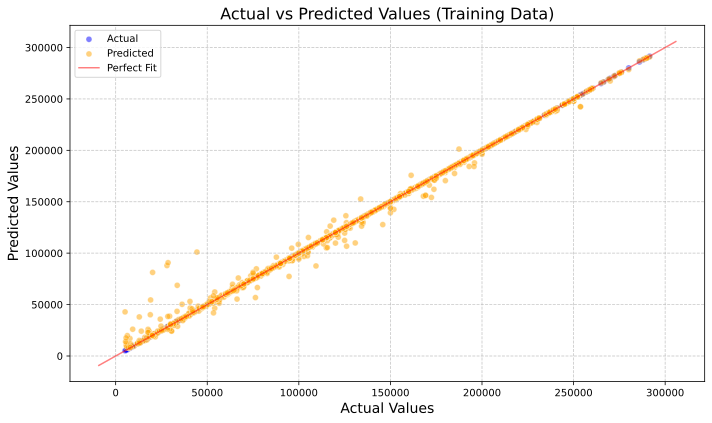

In [20]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for actual values
ax.scatter(y_train, y_train, alpha=0.5, color='blue', edgecolors='w', linewidth=0.5, label="Actual")

# Scatter plot for predicted values
ax.scatter(y_train, y_pred_train_rf, alpha=0.5, color='orange', edgecolors='w', linewidth=0.5, label="Predicted")

# Diagonal line for perfect predictions
limits = [min(ax.get_xlim() + ax.get_ylim()), max(ax.get_xlim() + ax.get_ylim())]
ax.plot(limits, limits, color='red', alpha=0.5, label="Perfect Fit")

# Grid, title, and labels
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title("Actual vs Predicted Values (Training Data)", fontsize=16)
ax.set_xlabel("Actual Values", fontsize=14)
ax.set_ylabel("Predicted Values", fontsize=14)

# Displaying the legend
ax.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()


## Summary

**Process Overview:**
The dataset at hand encompasses a mixture of categorical and numerical columns, all processed to be in a numerical format for seamless machine learning application. Our primary goal was to predict an individual's salary based on the data available. The dataset was divided into a 70-30 train-test split, using a random state for reproducibility. Two algorithms, namely Linear Regression and Random Forest Regression, were put to the test.

---

**Results & Interpretation:**
Upon training, the models were evaluated on their respective RMSE values. The Linear Regression model produced an RMSE of 18552, whereas the Random Forest model yielded an RMSE of 3347. Clearly, the Random Forest model outperformed its counterpart, suggesting a better accuracy in salary prediction. Further evaluation using R-squared scores supported this inference. While Linear Regression produced a commendable R-squared of 0.88, the Random Forest model went a notch higher with a remarkable R-squared value of 0.99.

---

**Deep Dive & Noteworthy Insights:**

Visualization Interpretation: An insightful scatter plot was generated, highlighting the predicted versus actual values for the Random Forest model. Such a representation provides an intuitive understanding of model accuracy. For an ideal model, all points would lie on the "Perfect Fit" diagonal line. The Random Forest model's predictions seem to cluster closely around this line, indicating its efficiency.

Coefficient Examination (Linear Regression): While the focus shifted towards the superior performance of the Random Forest model, the coefficients from the Linear Regression still hold valuable insights. These coefficients provide a measure of how each feature impacts salary. For instance, a positive coefficient for a particular feature indicates that as the feature value increases, the predicted salary is likely to increase as well. Analyzing these coefficients would give clarity on the significance of each variable in determining salaries.

Random Forest Intricacies: The Random Forest model clearly stood out in this analysis, but one must be cautious. The extremely low RMSE might indicate the model is potentially overfitting the training data. Techniques such as cross-validation or pruning could be employed to validate and potentially refine the model further.

Recommendations & Future Scope:
For improved model fidelity, one might look into the residuals, analyze them for any patterns, and see if any additional features or transformations are required. The feature importance from the Random Forest could provide valuable insights into which variables are the most influential in determining salaries. Lastly, other algorithms, hyperparameter tuning, or even ensemble techniques could be explored to ensure the robustness and generalization capabilities of our model.

In conclusion, our endeavors in predicting salaries were systematic, employing a blend of modeling, evaluation, and visualization techniques. The insights derived from this analysis not only help in understanding the dataset better but also pave the way for refining future predictions.